In [1]:
# change the working directory
setwd("~/popgenomics/data/fst_hmm/")

# load library to speed up loading of big tables
library(data.table)

# load a library of functions for population genetics calculations
library(popgenfunctions)

In [2]:
# load file with allele frequencies
pops.af<-fread("timemaHVAxHVC.alfreq.txt", header=T, sep="\t")
# check table
head(pops.af)

locus                       afHVA  afHVC 
1 lg01_ord0000_scaf00353:8612 0.0006 0.0005
2 lg01_ord0000_scaf00353:8752 0.0674 0.1185
3 lg01_ord0000_scaf00353:8758 0.0001 0.0201
4 lg01_ord0000_scaf00353:8770 0.0001 0.0000
5 lg01_ord0000_scaf00353:8772 0.0408 0.0263
6 lg01_ord0000_scaf00353:8797 0.0401 0.0255

In [3]:
# Calculate Fst for all loci
fst.HVAxHVC<-hudsonFst(locus=pops.af$locus, p1=pops.af$afHVA,p2=pops.af$afHVC)
# check results
head(fst.HVAxHVC)

locus                       numerator  denominator fst         
1 lg01_ord0000_scaf00353:8612 0.00109939 0.00109940  9.095870e-06
2 lg01_ord0000_scaf00353:8752 0.16731499 0.16992620  1.536673e-02
3 lg01_ord0000_scaf00353:8758 0.01979598 0.02019598  1.980592e-02
4 lg01_ord0000_scaf00353:8770 0.00009999 0.00010000  1.000000e-04
5 lg01_ord0000_scaf00353:8772 0.06474367 0.06495392  3.236910e-03
6 lg01_ord0000_scaf00353:8797 0.06334174 0.06355490  3.353951e-03

In [4]:
# Write table to file
write.table(fst.HVAxHVC, file="timemaHVAxHVC.fst.dsv", 
                quote=F, row.names=F, sep="\t")

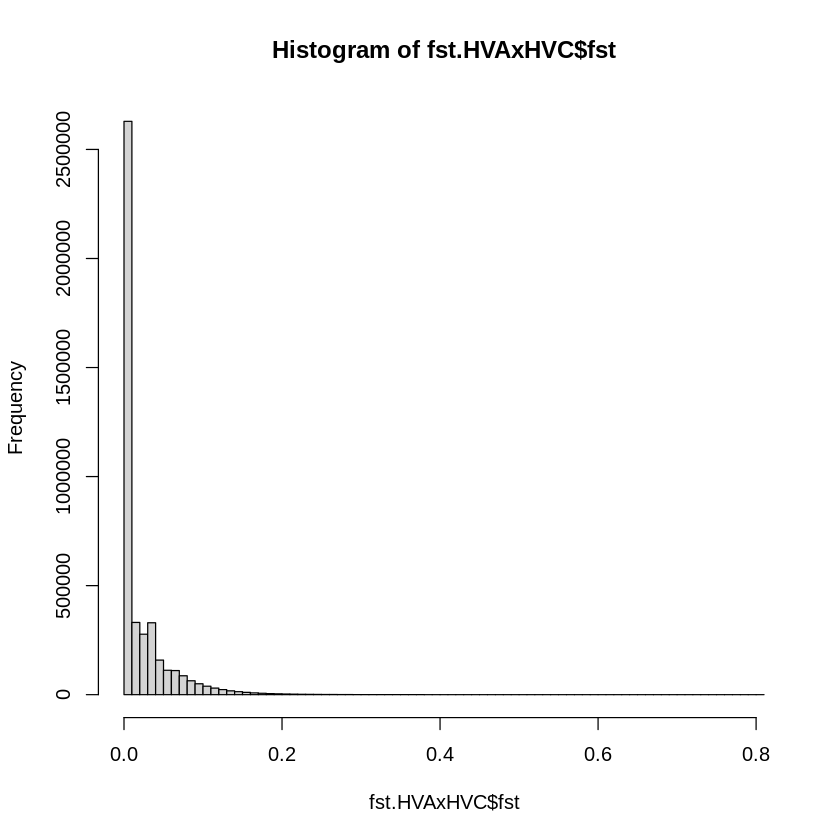

In [5]:
# plot FST histogram
hist(fst.HVAxHVC$fst, breaks=100)

In [6]:
# Genome-wide FST statistics
# ------------------------------------------------------------------------------
# Calculate genome-wide FST as "ratio of averages" following Bhatia et al. 2013
nloci<-length(na.exclude(fst.HVAxHVC$fst))
fst.mean<-1-((sum(fst.HVAxHVC$numerator)/nloci)/(sum(fst.HVAxHVC$denominator)/nloci))
fst.mean

[1] 0.03246807

In [7]:
# "average of ratios" yields a noticeable lower value
mean(fst.HVAxHVC$fst,na.rm=T)

[1] 0.02016506

In [8]:
# median and upper quantiles for all loci
fst.quantile<-quantile(fst.HVAxHVC$fst, prob=c(0.5,0.95,0.99,0.999,0.9999), na.rm=T)
fst.quantile

# max
fst.max<-max(fst.HVAxHVC$fst,na.rm=T)
fst.max

# put all together in a vector
fst.genome<-c("genome",nloci,fst.mean,fst.quantile,fst.max)
# ------------------------------------------------------------------------------

50%         95%         99%       99.9%      99.99% 
0.001928459 0.090937769 0.154023986 0.248341322 0.350245772

[1] 0.80748

In [9]:
# FST stats by linkage group
# ------------------------------------------------------------------------------
# get linkage groups from loci names
lgs<-unique(gsub("_ord.*","", fst.HVAxHVC$locus))

# calculate fst for each linkage group
fst.stats.lgs<-lapply(lgs, fst.lg)

# put them together in a data frame
fst.stats.lgs<-data.frame(lg=lgs,do.call("rbind",fst.stats.lgs),stringsAsFactors=F)
# ------------------------------------------------------------------------------

In [10]:
# summarize results
# ------------------------------------------------------------------------------
# put together whole genome and linkage group estimates
fst.stats<-rbind(fst.genome,fst.stats.lgs)

# put names of columns
colnames(fst.stats)<-c("lg","nloci","mean","median",
                       "q95%","q99%","q99.9%","q99.99%","max")

# and check
fst.stats

# Write summary table to file
write.table(fst.stats,file="timemaHVAxHVC.lgs.fst.dsv",
            quote=F, row.names=F, sep="\t")
# ----------------------------------------------------------------------------

lg     nloci   mean               median              q95%              
1  genome 4319439 0.0324680654573722 0.00192845888350124 0.0909377693636409
2  lg01   267564  0.0301078904403004 0.0031904868645159  0.0884981582736751
3  lg02   166226  0.0299831712898884 0.00361428773902395 0.0914797507519968
4  lg03   585091  0.0316168005541345 0.00212575940481041 0.0900051091544554
5  lg04   767800  0.0329826428947182 0.00190994607837519 0.0916187386132142
6  lg05   65867   0.0312422014169011 0.00304224033698663 0.0919230648837966
7  lg06   436818  0.034650845695362  0.00142955169258907 0.0929332778006153
8  lg07   235253  0.0317397500164739 0.00119321568308728 0.0883167558128002
9  lg08   319757  0.032050664771539  0.00178639380998691 0.0912381550549307
10 lg09   266352  0.0332351688186138 0.00164410959312405 0.090775995091986 
11 lg10   304133  0.0334820198938703 0.00157790634257271 0.0917188852152727
12 lg11   322986  0.0323849617536285 0.00169289942829542 0.0903456177479777
13 lg12   236596  0.0329526412208734 0.00181172663312212 0.0909418796881029
14 lg13   344996  0.0329163999769144 0.00197619865566451 0.0913197565896435
   q99%              q99.9%            q99.99%           max              
1  0.154023986400102 0.248341322172045 0.350245771667869 0.807480018438238
2  0.149308841384943 0.239895998577314 0.335445926504867 0.515322664111903
3  0.152469324999881 0.253392596497627 0.345546517087462 0.807480018438238
4  0.152726320946981 0.245592672957854 0.347841347854197 0.799309182416197
5  0.154960864789714 0.247896275236864 0.357443764362687 0.685852369532935
6  0.151285174938145 0.245722966256421 0.352965206856773 0.57362525513696 
7  0.156861564901276 0.25369286136523  0.358930398086542 0.481480038273059
8  0.15110876579829  0.243147144952029 0.34958324313175  0.477096559243217
9  0.154792306565541 0.251203968680515 0.361015717717183 0.668120771077009
10 0.154129041815757 0.252078999761159 0.345873797655772 0.51628952726371 
11 0.15432678745797  0.245690211972556 0.343101072133198 0.528003781415044
12 0.154826632332325 0.25305658825713  0.340161966814436 0.666923507513609
13 0.154363361689808 0.244626033340896 0.335620459798011 0.462156797265653
14 0.15474975260962  0.249849625348904 0.359730217553427 0.6137